# **Practical No: 4**

**AIM:** House Price Prediction

**CODE and OUTPUT:**

In [23]:
#  pandas for data manipulation and reading our dataset 

# scikit-learn to build our machine learning model. 

# matplotlib to plot and find out relations between each feature of the dataset

import pandas as pd

import numpy  as np

import seaborn as sns

import matplotlib.pyplot as plt



In [24]:

house = pd.read_csv('/content/USA_Housing.csv')


In [25]:

house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [26]:
house.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [27]:
# describe() function to get some statistical properties on our data

house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [28]:
house.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [29]:
# datatype of all the attributes

house.dtypes


Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [30]:
# isnull() function to point out a particular value missing in that column
# sum() function to give us the count of the missing values in that column

house.isna().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

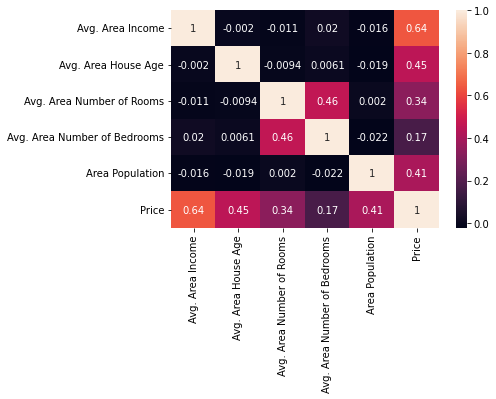

In [31]:
# plot for visualizing the data

# sns.pairplot(house)

# corr() to get the correlations of each feature present in the dataset. 

# plot a heatmap 

sns.heatmap(house.corr(), annot=True)


In [32]:
# first split our up our data into an X list that contains the feature to train on

# and a Y list with the target variable in this case Price column. 

X = house[['Avg. Area Income', 'Avg. Area House Age' , 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

In [33]:
Y = house['Price']

In [34]:
# split dataset into training set and testing set using sklearn train_test_split()
# 80% of the split data as training data and 20% as test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.20, random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [36]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [37]:
#  evaluate the model by checking it's coefficients and how to interpret them

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                                Coefficient
Avg. Area Income                  21.666735
Avg. Area House Age           164990.051829
Avg. Area Number of Rooms     120784.238317
Avg. Area Number of Bedrooms    1542.524676
Area Population                   15.150370


In [38]:

# Holding all the other features fixed, a 1 unit increase in Avg. 
# Area Income is associated with an increase of $21.66.


# Holding all the other features fixed, a 1 unit increase in Avg. 
# Area House Age is associated with an increase of $164990.05


# Holding all the other features fixed, a 1 unit increase in Avg. 
# Area Number of Rooms is associated with an increase of $120784.23


# Holding all the other features fixed, a 1 unit increase in Avg. 
# Area Number of Bedrooms is associated with an increase of $1542.52


#Holding all the other features fixed, a 1 unit increase in Area Population of Bedrooms is associated with an increase of $15.15


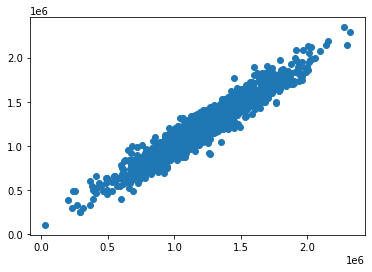

In [39]:

predictions = lm.predict(X_test)

plt.scatter(Y_test,predictions)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


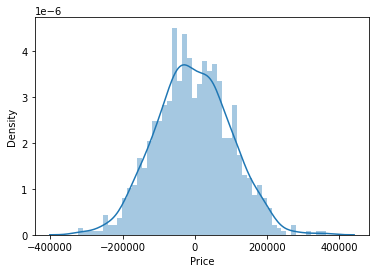

In [40]:
sns.distplot((Y_test-predictions), bins=50)

In [41]:
# In the above histogram plot, data is in bell shape(Normally Distributed), 
# which means model has done good predictions